##USA HOUSING DATA

###The data contains the following columns:

- 'Avg. Area Income': Avg. The income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in the same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in the same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in the same city
- 'Area Population': The population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:


# Load the dataset
file_path = '/content/drive/MyDrive/kapil/SL/LinearRegression/Data/USA_Housing.csv'
df = pd.read_csv(file_path)

In [17]:


# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [18]:


# EDA: Summary statistics
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [19]:

# EDA: Checking for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


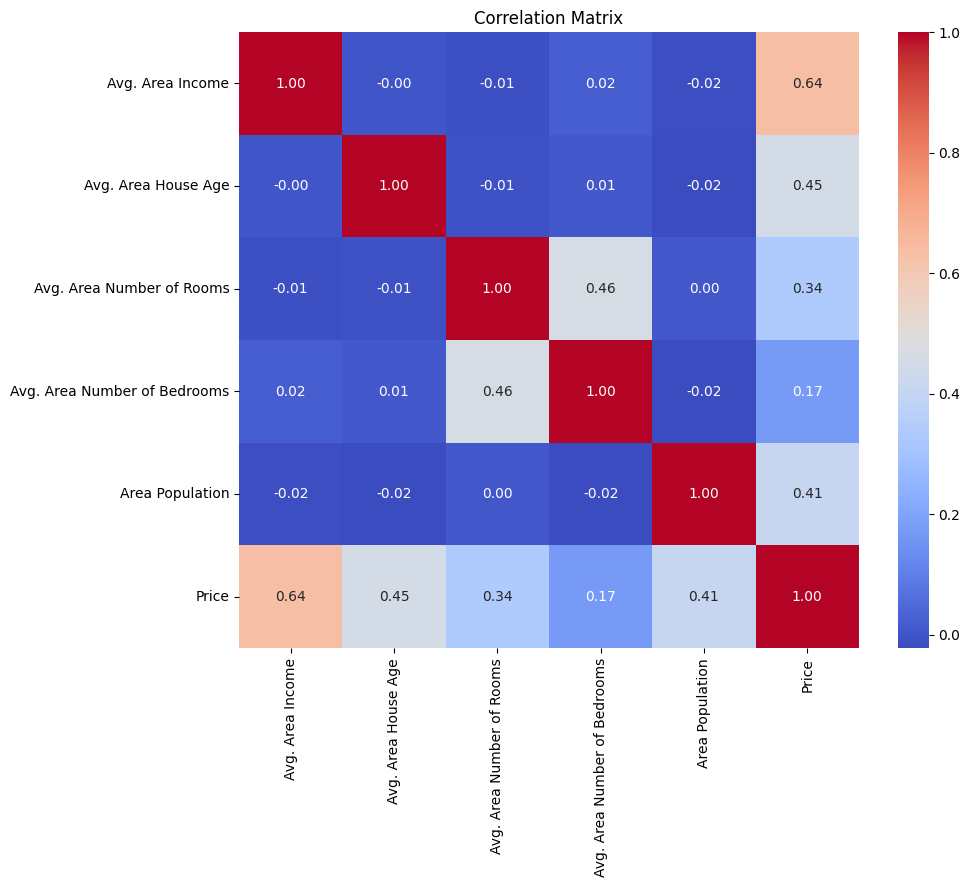

In [20]:
# EDA: Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

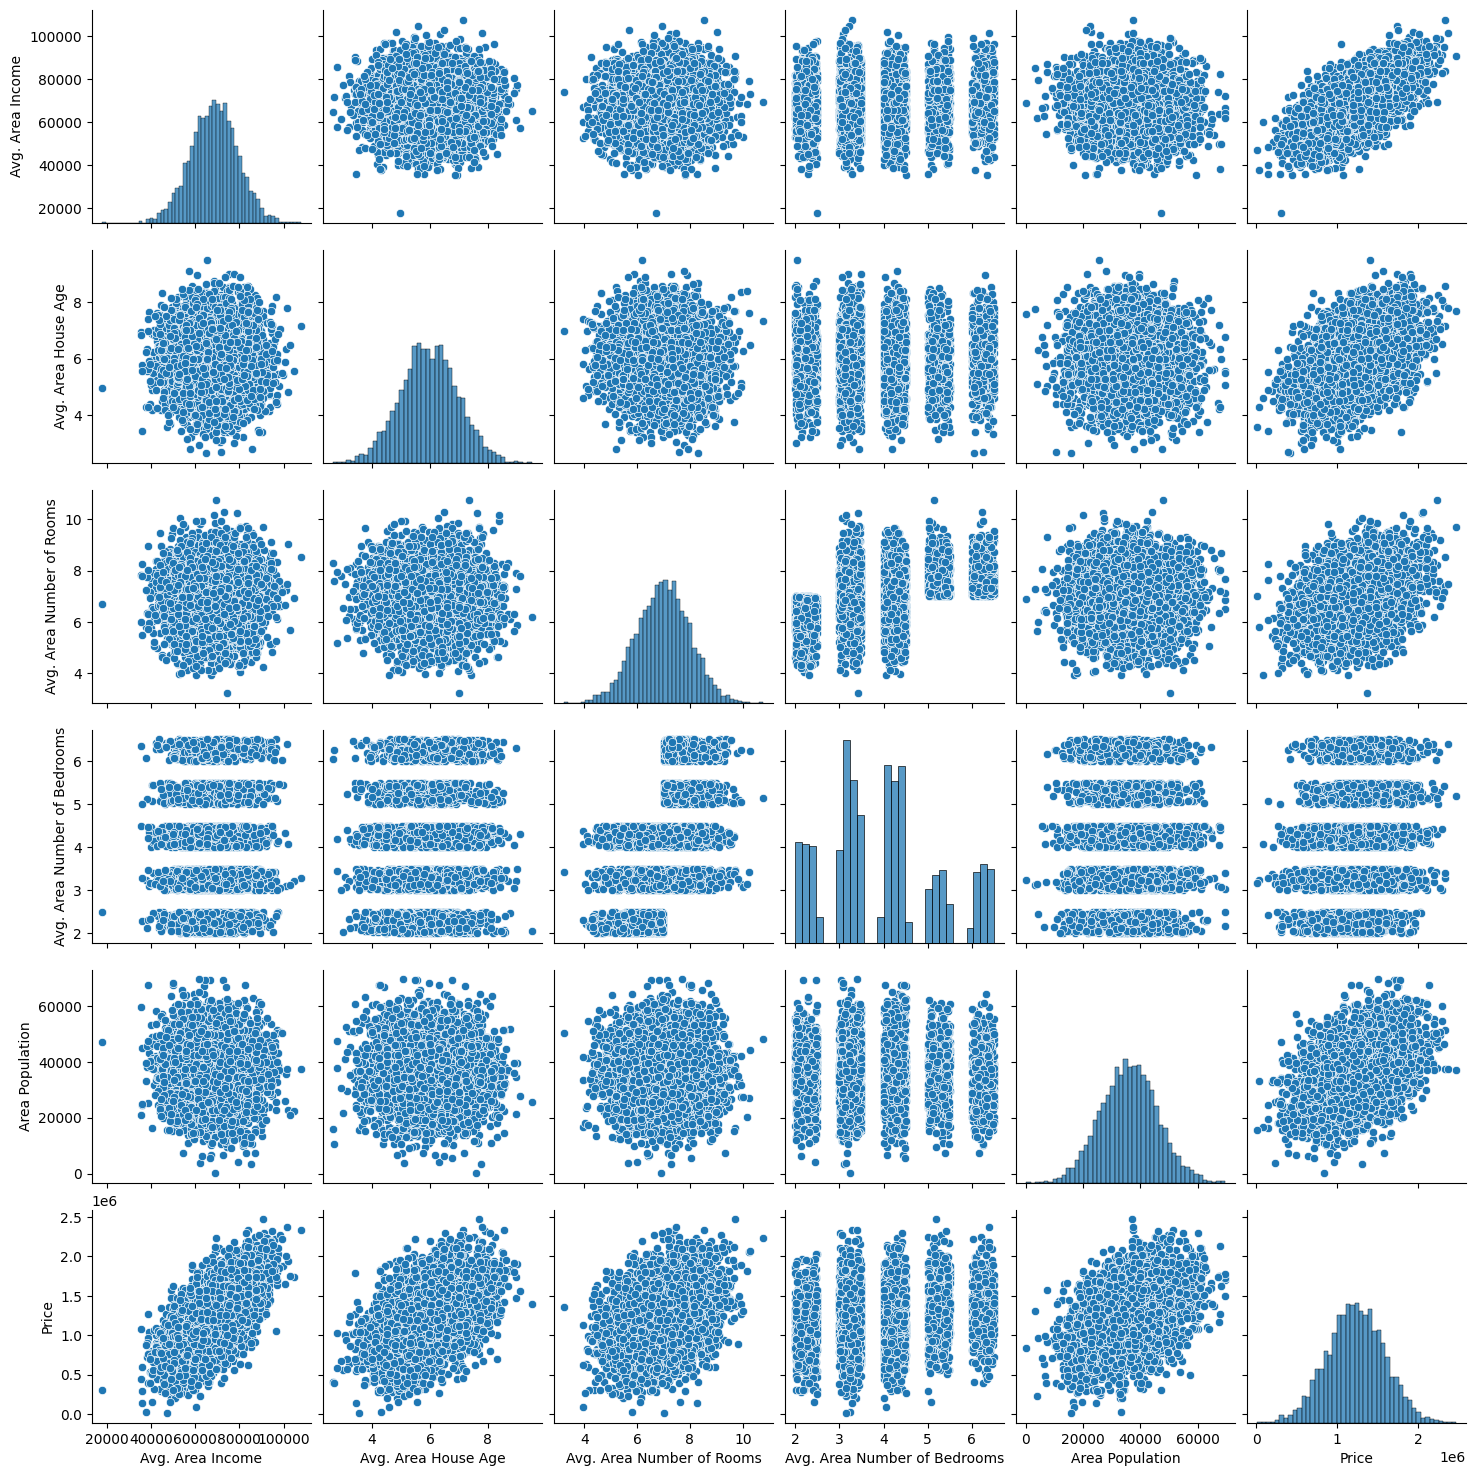

In [21]:


# EDA: Pairplot of features
sns.pairplot(df)
plt.show()

In [22]:
# Prepare the data by selecting relevant features
X = df.drop(columns=['Price', 'Address'])
y = df['Price']

In [23]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:

# Predict on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)





In [26]:
# Calculate performance metrics for both training and test sets
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


In [27]:
# Training performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])




In [28]:
# Test performance
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])


In [29]:
print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")

print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Training Performance:
Mean Absolute Error (MAE): $81480.50
Root Mean Squared Error (RMSE): $101425.06
R-squared (R²): 0.92
Adjusted R-squared (Adj. R²): 0.92

Test Performance:
Mean Absolute Error (MAE): $81135.57
Root Mean Squared Error (RMSE): $100341.53
R-squared (R²): 0.91
Adjusted R-squared (Adj. R²): 0.91


In [30]:

# Compare training and test performance
print("\nPerformance Comparison:")
print(f"Training vs Test MAE: ${mae_train:.2f} vs ${mae_test:.2f}")
print(f"Training vs Test RMSE: ${rmse_train:.2f} vs ${rmse_test:.2f}")
print(f"Training vs Test R²: {r2_train:.2f} vs {r2_test:.2f}")
print(f"Training vs Test Adj. R²: {adj_r2_train:.2f} vs {adj_r2_test:.2f}")



Performance Comparison:
Training vs Test MAE: $81480.50 vs $81135.57
Training vs Test RMSE: $101425.06 vs $100341.53
Training vs Test R²: 0.92 vs 0.91
Training vs Test Adj. R²: 0.92 vs 0.91



### Observations:
- 1. The R² value of 0.91 indicates that the model explains 91% of the variance in house prices, which suggests a good fit.
- 2. The RMSE of approximately $100,341.53 suggests that the model's predictions have an average error of this amount.
- 3. The heatmap shows strong correlations between the target variable (Price) and features like Avg. Area Income and Avg. Area Number of Rooms.
- 4. No missing values were detected in the dataset, which means the data is complete and ready for modeling.
- 5. Further model improvement could be considered by exploring polynomial regression, feature engineering, or regularization techniques.


### Training Performance:
- **Mean Absolute Error (MAE):** $81,480.50
  - **Interpretation:** On average, the model's predictions are off by approximately $81,480.50 from the actual values. This is a measure of the average absolute error in the model's predictions.
  
- **Root Mean Squared Error (RMSE):** $101,425.06
  - **Interpretation:** The RMSE is higher than the MAE, which suggests that there are larger errors in some predictions. RMSE gives more weight to larger errors due to squaring, so it’s useful for understanding the magnitude of the larger errors.

- **R-squared (R²):** 0.92
  - **Interpretation:** The model explains 92% of the variance in the target variable. This is a high R² value, indicating a strong fit of the model to the training data.

- **Adjusted R-squared (Adj. R²):** 0.92
  - **Interpretation:** Adjusted R² accounts for the number of predictors in the model and provides a more accurate measure of goodness-of-fit. The high value suggests that the model is well-specified and the number of predictors is appropriate.

### Test Performance:
- **Mean Absolute Error (MAE):** $81,135.57
  - **Interpretation:** On average, the model's predictions on the test set are off by about $81,135.57. This is very close to the training MAE, indicating similar performance on unseen data.

- **Root Mean Squared Error (RMSE):** $100,341.53
  - **Interpretation:** The RMSE is slightly lower on the test set compared to the training set. This suggests that the model's performance is slightly better on the test data compared to the training data.

- **R-squared (R²):** 0.91
  - **Interpretation:** The model explains 91% of the variance in the test data, which is slightly lower than on the training data but still high. This indicates that the model generalizes well to new, unseen data.

- **Adjusted R-squared (Adj. R²):** 0.91
  - **Interpretation:** The adjusted R² for the test set is also high, showing that the model is well-tuned and not overfitting. The slight decrease from the training adjusted R² is expected and indicates a good balance between bias and variance.

### Overall Interpretation:
1. **Good Model Fit:** The high R² and adjusted R² values for both training and test sets suggest that the model fits the data well and generalizes effectively to new data.
2. **Error Metrics:** Both MAE and RMSE are fairly consistent between training and test sets, indicating that the model performs similarly on both datasets. The slightly higher error metrics in the training set compared to the test set might be due to overfitting or simply variability in the data.
3. **No Major Signs of Overfitting:** Since the test performance metrics are close to the training metrics, there are no major signs of overfitting. The model's ability to predict on unseen data is strong, as evidenced by the similar performance metrics.
